# Gillespie Exploratory Data Analysis - 10+ Years of Quantified Self Data

title: 10+ Years of Quantified Self Data
author: Aaron Gillespie
date: 2025-02-16 and thereabouts
purpose: This Jupyter notebook (will) introduce and explore data pulled from my long-running personal quantified self project - aka my "Data Journal". I'd like to explore my personal dataset as a means to do some self-directed work with Python & Jupyter Notebooks. In terms of what I hope to stories I hope to achieve with the analysis - I hope to tell the story that having a "life in a spreadsheet" is both easy and worthwhile.

## Background - The Data Journal
Data Journal is a system I built to help me keep track of stuff that happens in my life. Its form has changed greatly over the past decade, but its function has remained the same: to house data about things I do. It’s a default place to make note of things that might not otherwise have a place. I’ve tracked lots of different things over the years.

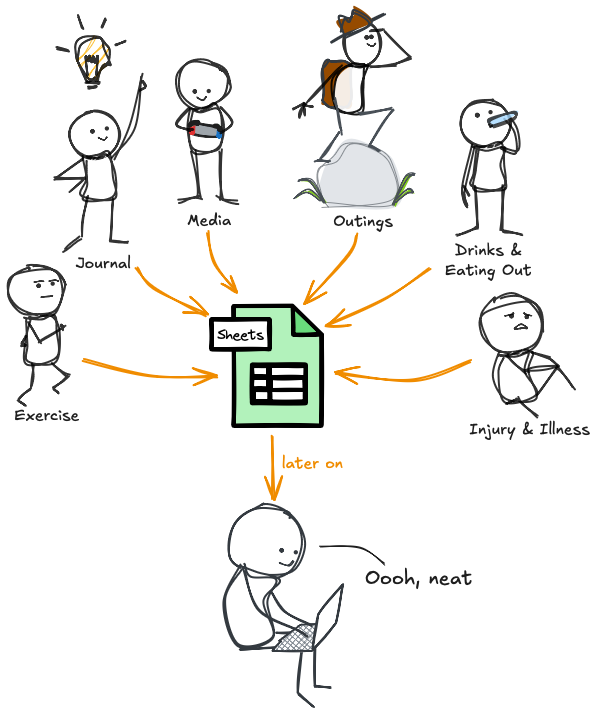

My Data Journal allows me to answer questions like:

- “When did this pain in my back start?”
- “How many workouts have I done this year?”
- “When was the last time I hung out with this person?”
- “How many drinks have I had the past few weeks?”
- “Have I eaten out more or exercised more this month?”
- “Have I met this goal I set for myself?” 

### What I'm Tracking Now

This list has been honed over time. I've tracked everything on this list since at January 1st 2020, and several things dating way way before that (dating back to 2013). I track these things because they've proven themselves either useful or amusing enough to continue being noted.

- **Workouts**
	- `Name` - title of workout or short description
	- `Type` - one of strength/cardio/mobility
	- `Note` - comment field, usually about how the workout went
- **Pains**
	- `Pains` - comma separated list of symptoms
	- `Treatments` - comma separated list of medicines/therapies
	- `Note` - what happened, or general place to complain
- **Media**
	- `Type` - one of book/movie/TV/Videogame
	- `Title` - of the piece of media
	- `First Time` - yes or no, is this my first time with this piece of media?
- **Outings**
	- `Type` - comma separated list of various tags, e.g. eating out, seeing friends, etc
	- `Where` - name of place visited
	- `Note` - usually how it went or why we're there
- **Quotes**
	- `Quote` - what was said
	- `Quoter` - who said it
	- `Note` - any additional context
- **Events**
	- `Event` - a catch-all for any time-based thing I want to make note of - e.g. "replaced hot water heater"
- **Daily Things**
	- `Summary` - A brief description of the day. What I did. Who I saw. How it went.
	- `Health` - 1-to-10 how healthy do I feel?
	- `Satisfaction`  - 1-to-10 how satisfied am I with the day?
	- `Bedtime` - time of night falling asleep
	- `Wake` - time of morning waking
	- `Sleep Duration` - duration between the above
	- `Sleep Location` - city & state I'm located at at 3:30 AM
	- `Work Status` - one of Weekend/At Work/WFH/Holiday/Sick/Vacation
- **Weekly**
	- Formulas summarizing all of the above
- **Monthly**
	- Formulas summarizing all of the above
- **Quarterly**
	- Formulas summarizing all of the above
- **Yearly**
	- Formulas summarizing all of the above
	- `Big Event` - it seems like every year has one, they mark the passage of time
	- `Podcast Listen Time` - Hours 
	- `YouTube View Count` - per Google Takeout
	- `Puzzle Box` - name of my annual puzzle box

Looks like a lot, and it probably is, but I've made capture very easy. All of the sleep-related stuff happens automatically. Everything else is primarily entered in an ad-hoc manner via Siri Shortcuts.

> [!NOTE]  
> The data included in this Git Repository are a subset of the data above. For more information on the Data Journal, including how I built and operate it, see [my personal site](https://aarongilly.com/Pages/Data-Journal#how-to).

## Imports

Creating references to libraries I'll be utilizing.

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import csv

## Load Data - Daily

Loading data from `Data Journal 11 - Days`, which contains one row per day for the past 4300 days.

In [43]:
# Load CSV to DataFrame
df = pd.read_csv('source_data/Data Journal 11 - Days.csv')

# Initial Data Exploration - shaping
print(df.head(10))
print(df.shape)
print(df.dtypes)

      Date Wk Day   Day      Week    Month  Quarter  Year  Week Int  \
0  2/15/25    Sat  4317  2025-W07  2025-02  2025-Q1  2025         7   
1  2/14/25    Fri  4316  2025-W07  2025-02  2025-Q1  2025         7   
2  2/13/25   Thur  4315  2025-W07  2025-02  2025-Q1  2025         7   
3  2/12/25    Wed  4314  2025-W07  2025-02  2025-Q1  2025         7   
4  2/11/25    Tue  4313  2025-W07  2025-02  2025-Q1  2025         7   
5  2/10/25    Mon  4312  2025-W07  2025-02  2025-Q1  2025         7   
6   2/9/25    Sun  4311  2025-W06  2025-02  2025-Q1  2025         6   
7   2/8/25    Sat  4310  2025-W06  2025-02  2025-Q1  2025         6   
8   2/7/25    Fri  4309  2025-W06  2025-02  2025-Q1  2025         6   
9   2/6/25   Thur  4308  2025-W06  2025-02  2025-Q1  2025         6   

   Month Int  Version  ...  Journal  Satisfaction  Health  Work Status  \
0          2       11  ...      NaN           8.0     9.0          NaN   
1          2       11  ...      NaN           7.0     8.0          NaN

### Transformations

Doing some basic manipulations to make the data easier to work with:

- Deletion - the dataset includes several columns which were sanitized for publication. These columns do not need to exist and add clutter.
- Renaming - several columns could have more descriptive headers
- Addition - some rows contain blank values for days where I failed to track things, these could be more explicitly called out via a new column

In [44]:
# Data Cleaning 
# Removing sanitized columns & helper columns
df = df.drop(['Week Int', 'Month', 'Quarter', 'Year', 'Month Int', 'Version', 'Journal', 'Location', 'Work Status', 'Photos', 'Calendar', 'Quotes', 'Events'], axis=1)

# Renaming columns
df = df.rename(columns={'Satisfaction': 'Satisfaction (out of 10)', 'Health': 'Health (out of 10)', 'Sleep Duration': 'Sleep Duration (hrs)', 'Weight': 'Weight (lbs)'})

# Data Cleaning - Handling missing values
df['Missing'] = df['Satisfaction (out of 10)'].isna()

# Checking dataframe post cleaning
print(df.head(10))
print(df.shape)
print(df.dtypes)

      Date Wk Day   Day      Week  Satisfaction (out of 10)  \
0  2/15/25    Sat  4317  2025-W07                       8.0   
1  2/14/25    Fri  4316  2025-W07                       7.0   
2  2/13/25   Thur  4315  2025-W07                       6.0   
3  2/12/25    Wed  4314  2025-W07                       6.0   
4  2/11/25    Tue  4313  2025-W07                       4.0   
5  2/10/25    Mon  4312  2025-W07                       7.0   
6   2/9/25    Sun  4311  2025-W06                       5.0   
7   2/8/25    Sat  4310  2025-W06                       4.0   
8   2/7/25    Fri  4309  2025-W06                       2.0   
9   2/6/25   Thur  4308  2025-W06                       2.0   

   Health (out of 10)      Bedtime        Wake  Sleep Duration (hrs)  \
0                 9.0  12:09:02 AM  8:05:03 AM                  7.93   
1                 8.0  12:39:00 AM  7:45:00 AM                  7.10   
2                 7.0  11:26:00 PM  7:36:00 AM                  8.17   
3                 

## Initial Descriptive Statistics

Using the DataFrame describe() method to display summary statistics for each Numerical column.

In [45]:
# Utilizing the built-in "describe()" method
print(df[['Satisfaction (out of 10)','Health (out of 10)', 'Sleep Duration (hrs)', 'Weight (lbs)']].describe())

       Satisfaction (out of 10)  Health (out of 10)  Sleep Duration (hrs)  \
count               2635.000000         2632.000000           3102.000000   
mean                   5.950285            8.852964              7.595364   
std                    1.775828            1.650138              1.331137   
min                    1.000000            1.000000              1.620000   
25%                    5.000000            8.000000              6.850000   
50%                    6.000000           10.000000              7.580000   
75%                    7.000000           10.000000              8.330000   
max                   10.000000           10.000000             18.680000   

       Weight (lbs)  
count    527.000000  
mean     228.597913  
std        3.801903  
min      214.000000  
25%      227.000000  
50%      229.000000  
75%      231.000000  
max      238.000000  


### Descriptive Statistical Observations

#### Deltas in Count

The `count` of each of my 3 numerical columns reveals a fact I forgot - I didn't start tracking subjective daily "satisfaction" and "health" metrics until version 4 of my Data Journal. This is why there are only 2600 results for each of those where the source data has 4300 rows. The "Journal" column, which I've redacted for the sake of privacy for my family and friends, would have included values in nearly all of the 4300 rows.

#### Differences between Satisfaction & Health

My average "Satisfaction" rating is 5.95 out of 10, whereas my average "Health" rating is 8.85. This goes to show that I'm typically pretty healthy, and that I'm, on average, more satisfied than not with how life is going. You may infer there's room for improvement with life satisfaction (and, to be honest, there always is), however I've come to realize [Hedonic Adaptation](https://en.wikipedia.org/wiki/Hedonic_treadmill) is a thing and that it's difficult to *actually* move happiness/satisfaction far from your hedonic set point.

#### Sleep Duration

I'm particularly pleased with my sleep duration. Depsite a bedtime & waketime that DO waffle around more than I'd like, the middle 50% of my sleep duration metrics fall within a very healthy range of 6.85 hours per night to 8.33 hours per night, with the average sitting at 7.59 hours. This is over 3102 tracked sleeps - which span the birth and rearing of two children. 

#### Weight

I'm heavier than most people, but I'm also taller than essentially *everyone*, so that's not something I'm surprised by or disappointed with. In fact I'm quite happy with a standard deviation of only 3.8 pounds over 527 measurements dating from 2014 to 2025. This would mean that (assuming normal distribution (bad assumption)) 95% of my weigh-ins would fall within the same 15.2 lb span.

## Data Distribution for Numerical Columns

Utilizing Seaborn for data visualization - histograms for each daily subjective rating.

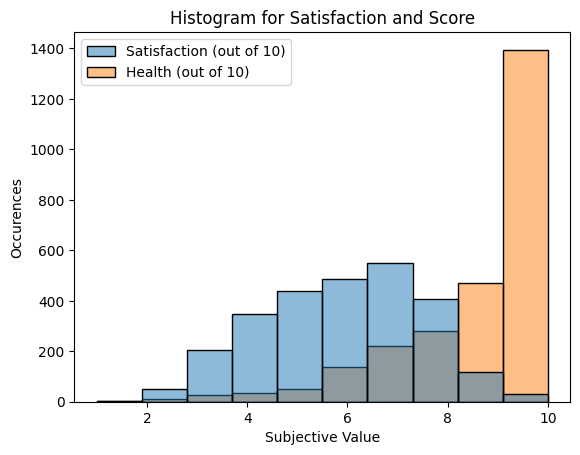

In [46]:
# Plotting using seaborn (multiple columns)
sns.histplot(df[['Satisfaction (out of 10)', 'Health (out of 10)']], bins=10, kde=False)

# Adding labels and title
plt.xlabel('Subjective Value')
plt.ylabel('Occurences')
plt.title('Histogram for Satisfaction and Score')

# Show the plot
plt.show()

### Data Distribution Observations

The data distribution add new insights on top of the basic descriptive statistics, but also more or less affirm what you might have assumed.

- **Health** - thankfully health follows an ever-increasing trend. The most common value of my subjective health rating, by far, is 10. Each "health point" dropped shows an equivalent drop in frequency.
- **Satisfaction** - satisfaction shows something more or less approaching a [left-skewed](https://en.wikipedia.org/wiki/Skewness) curve. I try to reserve the extremes (10s and 1s) for truly exceptional days. One thing that pops out in the histogram is that my most frequent satisfaction score is actually a 7/10, despite "7" not showing up in the descriptive statistics above.

## Data Distribution for a Categorical Column

My first dataset had all the potential categorical columns scrubbed out of it. Luckily, I did add one back in - whether or not the `Satisfaction` was tracked.

I have a more substantial *categorical* example on a later dataset.

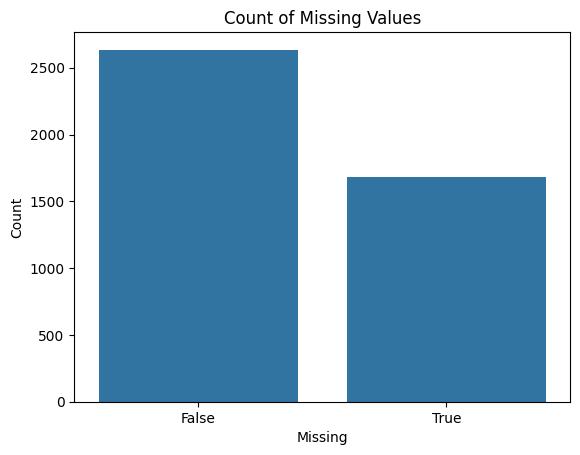

In [47]:
# Create a countplot for the "Missing" column
sns.countplot(x='Missing', data=df)

# Adding labels and title
plt.xlabel('Missing')
plt.ylabel('Count')
plt.title('Count of Missing Values')

# Show the plot
plt.show()

# Load Data - Media

Since 2019 I've tracked movies, TV shows, books, and videogames I've consumed. These data are *not* subject to the "one-row-per-day" format, and instead captured as one row **per occurance of media consumption**. This is a much more natural way to track things that may happen on frequency scales ranging from less-than-hourly to greater-than-weekly.

In [48]:
# Load CSV to DataFrame
media_df = pd.read_csv('source_data/Data Journal 11 - MEDIA.csv')

# Initial Data Exploration - shaping
print(media_df.head(10))
print(media_df.shape)
print(media_df.dtypes)

        Date      Week    Month  Quarter  Year           Timestamp Media Type  \
0  2/14/2025  2025-W07  2025-02  2025-Q1  2025  2/14/2025 23:49:06         TV   
1  2/14/2025  2025-W07  2025-02  2025-Q1  2025  2/14/2025 20:59:34      Movie   
2  2/13/2025  2025-W07  2025-02  2025-Q1  2025  2/13/2025 10:59:30         TV   
3  2/13/2025  2025-W07  2025-02  2025-Q1  2025  2/13/2025 10:58:48         TV   
4  2/12/2025  2025-W07  2025-02  2025-Q1  2025  2/12/2025 22:06:52         TV   
5   2/6/2025  2025-W06  2025-02  2025-Q1  2025   2/6/2025 18:15:45         TV   
6   2/6/2025  2025-W06  2025-02  2025-Q1  2025   2/6/2025 14:16:19         TV   
7   2/5/2025  2025-W06  2025-02  2025-Q1  2025    2/5/2025 9:46:20         TV   
8   2/4/2025  2025-W06  2025-02  2025-Q1  2025   2/4/2025 14:16:33       Book   
9   2/3/2025  2025-W06  2025-02  2025-Q1  2025   2/3/2025 21:38:15  Videogame   

                             Media Title First Time  Media Note  
0                              Severance  

## Cleaning

Similar to the `Days` dataset, there are helper columns and columns I've scrubbed out of existence. I'll clean those up here to reduce the data to be worked with.

In [49]:
# Data Cleaning 
# Removing sanitized columns & helper columns
media_df = media_df.drop(['Date', 'Week', 'Month', 'Quarter', 'Year', 'Media Note'], axis=1)

# Checking dataframe post cleaning
print(media_df.head(10))
print(media_df.shape)
print(media_df.dtypes)

            Timestamp Media Type                            Media Title  \
0  2/14/2025 23:49:06         TV                              Severance   
1  2/14/2025 20:59:34      Movie        Captain America Brave New World   
2  2/13/2025 10:59:30         TV                             Invincible   
3  2/13/2025 10:58:48         TV  Your Friendly Neighborhood Spider Man   
4  2/12/2025 22:06:52         TV  Your Friendly Neighborhood Spider Man   
5   2/6/2025 18:15:45         TV                             Invincible   
6   2/6/2025 14:16:19         TV                        The White Lotus   
7    2/5/2025 9:46:20         TV  Your Friendly Neighborhood Spider Man   
8   2/4/2025 14:16:33       Book               The 100 Things Challenge   
9   2/3/2025 21:38:15  Videogame                          Casual Birder   

  First Time  
0        NaN  
1       True  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
6       True  
7       True  
8        NaN  
9        NaN  
(1643, 4)

### Cleaning - Creating 4 Frames from One

"Media" is a broad brush to paint with. It might be more interesting to look at the titles grouped by the *type* of media they represent. This could be accomplished by breaking the large dataframe containing all media into 4 filtered copies.

In [50]:
# Create separate DataFrames based on Media Type
df_book = media_df[media_df['Media Type'] == 'Book']
df_movie = media_df[media_df['Media Type'] == 'Movie']
df_tv = media_df[media_df['Media Type'] == 'TV']
df_videogame = media_df[media_df['Media Type'] == 'Videogame']

From here additional analysis could be done on the titles of each type of media. I actually don't care to do this, but wanted to demonstrate turning one "large" DataFrame into multiple filtered copies.

## Categorical Analysis

I am interested in seeing the relative amounts of each type of media. This doesn't depend on `Timestamp` or `Media Title`, so I'll drop those columns and run a loop over the remaining categorical columns.

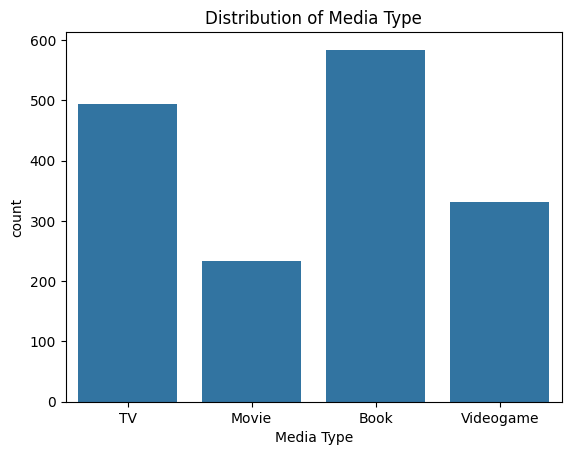

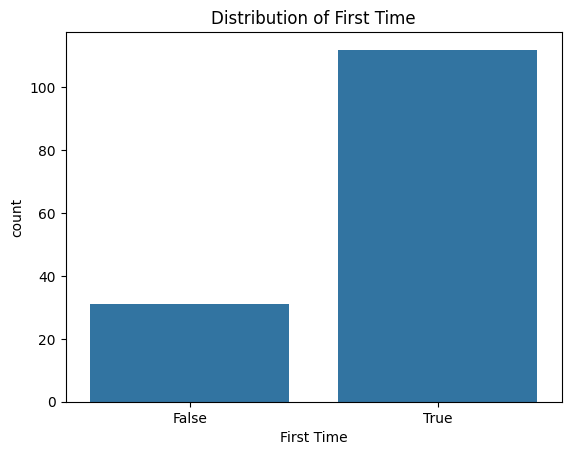

In [51]:

# Removing sanitized columns & helper columns
media_df = media_df.drop(['Timestamp', 'Media Title'], axis=1)

# Inspect value counts for all categorical columns
for col in media_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=media_df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### Observations

This shows that I read more than watch anything, I watch TV more than I play games, but I play games more often than I watch movies. As a guy with a movie podcast, this is a somewhat depressing result.

ALSO the "First Time" column shows that I typically don't track "first time" as *false*. I'll just leave it blank if it's not true. This is an opportunity to do some data cleaning.

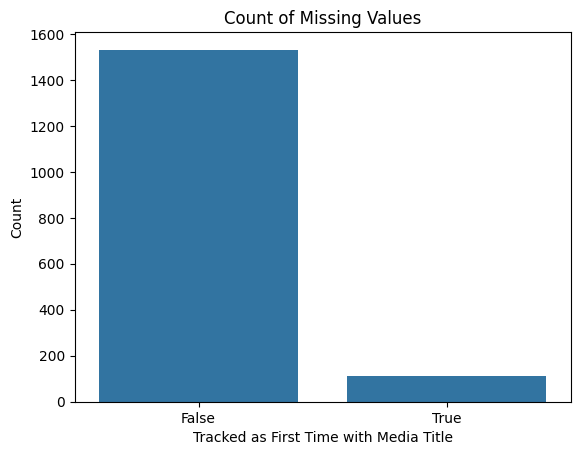

In [54]:
# Replace blank (NaN) values in 'First Time' with False
media_df['First Time'] = media_df['First Time'].fillna(False)

# Create a countplot for the "First Time" column
sns.countplot(x='First Time', data=media_df)

# Adding labels and title
plt.xlabel('Tracked as First Time with Media Title')
plt.ylabel('Count')
plt.title('Count of Missing Values')

# Show the plot
plt.show()

I believe, however, that this **also** doesnt' represent reality. The truth is "first time" hasn't always existed, and has always been a bit "Squishy". So perhaps there's not enough data validity to warrant further analysis.